In [ ]:
import matplotlib.pyplot as plt
import xarray

from rio_tiler.io import DataArrayReader

### MUR SST

In [2]:
ds = xarray.open_dataset(
    "https://mur-sst.s3.us-west-2.amazonaws.com/zarr-v1",
    engine="zarr",
    decode_coords="all",
    consolidated=True,
)
ds

<xarray.Dataset> Size: 117TB
Dimensions:           (time: 6443, lat: 17999, lon: 36000)
Coordinates:
  * lat               (lat) float32 72kB -89.99 -89.98 -89.97 ... 89.98 89.99
  * lon               (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0
  * time              (time) datetime64[ns] 52kB 2002-06-01T09:00:00 ... 2020...
Data variables:
    analysed_sst      (time, lat, lon) float64 33TB ...
    analysis_error    (time, lat, lon) float64 33TB ...
    mask              (time, lat, lon) float32 17TB ...
    sea_ice_fraction  (time, lat, lon) float64 33TB ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

In [3]:
da = ds["analysed_sst"]
da

<xarray.DataArray 'analysed_sst' (time: 6443, lat: 17999, lon: 36000)> Size: 33TB
[4174832052000 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 72kB -89.99 -89.98 -89.97 ... 89.97 89.98 89.99
  * lon      (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * time     (time) datetime64[ns] 52kB 2002-06-01T09:00:00 ... 2020-01-20T09...
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

In [ ]:
da = ds["analysed_sst"]

# Make sure we have a valid CRS
crs = da.rio.crs or "epsg:4326"
da.rio.write_crs(crs, inplace=True)

# Select the first time stamp
da = da.isel(time=0)

with DataArrayReader(da) as dst:
    print(dst.info())
    print(dst.minzoom, dst.maxzoom)

bounds=(-179.99500549324037, -89.99499786365084, 180.0050000000763, 89.99499786365084) crs='http://www.opengis.net/def/crs/EPSG/0/4326' band_metadata=[('b1', {})] band_descriptions=[('b1', 'value')] dtype='float64' nodata_type='Nodata' colorinterp=None scales=None offsets=None colormap=None name='analysed_sst' count=1 width=36000 height=17999 attrs={'comment': '"Final" version using Multi-Resolution Variational Analysis (MRVA) method for interpolation', 'long_name': 'analysed sea surface temperature', 'standard_name': 'sea_surface_foundation_temperature', 'units': 'kelvin', 'valid_max': 32767, 'valid_min': -32767}
0 6


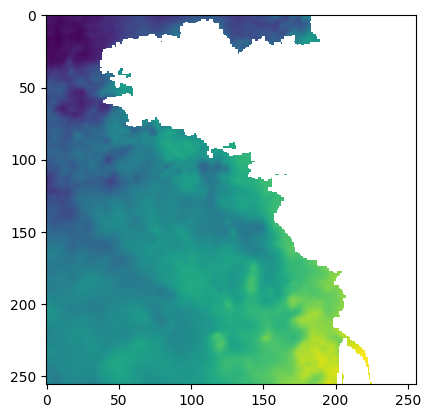

In [ ]:
with DataArrayReader(da) as dst:
    img = dst.tile(31, 22, 6)

plt.imshow(img.data_as_image())

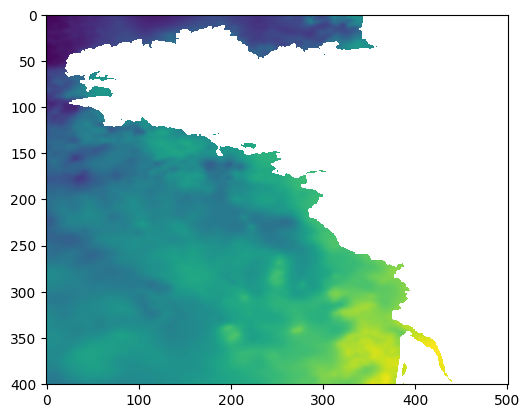

In [ ]:
with DataArrayReader(da) as dst:
    img = dst.part(
        [-5, 45, 0.0, 49],
        max_size=1024,
    )

plt.imshow(img.data_as_image())

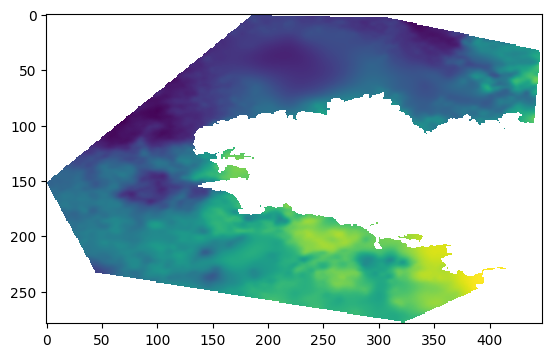

In [ ]:
geojson = {
    "type": "Feature",
    "properties": {},
    "geometry": {
        "coordinates": [
            [
                [-4.262517145703015, 49.58852771128011],
                [-6.121754821536115, 48.07366436953052],
                [-5.679508966604999, 47.26534294147169],
                [-2.890652452854056, 46.8101748147248],
                [-1.8527423498805433, 47.28371740880311],
                [-1.6541805026549241, 49.26565692911578],
                [-3.0440846882388257, 49.565118360747164],
                [-4.262517145703015, 49.58852771128011],
            ]
        ],
        "type": "Polygon",
    },
}

with DataArrayReader(da) as dst:
    img = dst.feature(
        geojson,
        max_size=1024,
    )

plt.imshow(img.data_as_image())

### NetCDF 

In [8]:
import fsspec

filesystem = fsspec.filesystem("https")

fp = filesystem.open(
    "https://dap.ceda.ac.uk/neodc/esacci/land_surface_temperature/data/MULTISENSOR_IRCDR/L3S/0.01/v2.00/monthly/2020/11/ESACCI-LST-L3S-LST-IRCDR_-0.01deg_1MONTHLY_DAY-20201101000000-fv2.00.nc"
)
ds = xarray.open_dataset(
    fp,
    engine="h5netcdf",
    decode_coords="all",
)
ds

<xarray.Dataset> Size: 36GB
Dimensions:          (time: 1, lat: 18000, lon: 36000, length_scale: 1,
                      channel: 2)
Coordinates:
  * time             (time) datetime64[ns] 8B 2020-11-01
  * lat              (lat) float32 72kB -90.0 -89.99 -89.98 ... 89.98 89.99
  * lon              (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0
  * channel          (channel) float32 8B 11.0 12.0
Dimensions without coordinates: length_scale
Data variables: (12/14)
    dtime            (time, lat, lon) timedelta64[ns] 5GB ...
    satze            (time, lat, lon) float32 3GB ...
    sataz            (time, lat, lon) float32 3GB ...
    solze            (time, lat, lon) float32 3GB ...
    solaz            (time, lat, lon) float32 3GB ...
    lst              (time, lat, lon) float32 3GB ...
    ...               ...
    lst_unc_loc_atm  (time, lat, lon) float32 3GB ...
    lst_unc_loc_sfc  (time, lat, lon) float32 3GB ...
    lst_unc_sys      (length_scale) float32 4B ...
    lcc              (time, lat, lon) float32 3GB ...
    n                (time, lat, lon) float32 3GB ...
    lst_unc_loc_cor  (time, lat, lon) float32 3GB ...
Attributes: (12/41)
    source:                     ESA LST CCI IRCDR L3S V2.00
    title:                      ESA LST CCI land surface temperature time ser...
    institution:                University of Leicester
    history:                    Created using software developed at Universit...
    references:                 https://climate.esa.int/en/projects/land-surf...
    Conventions:                CF-1.8
    ...                         ...
    geospatial_lon_resolution:  0.01
    geospatial_lat_resolution:  0.01
    key_variables:              land_surface_temperature
    format_version:             CCI Data Standards v2.2
    spatial_resolution:         0.01 degree
    doi:                        10.5285/785ef9d3965442669bff899540747e28

In [9]:
da = ds["lst"]

# # Make sure we have a valid CRS
crs = da.rio.crs or "epsg:4326"
da.rio.write_crs(crs, inplace=True)

# Select the first time stamp
# da = da.isel(time=0)
da

<xarray.DataArray 'lst' (time: 1, lat: 18000, lon: 36000)> Size: 3GB
[648000000 values with dtype=float32]
Coordinates:
  * time         (time) datetime64[ns] 8B 2020-11-01
  * lat          (lat) float32 72kB -90.0 -89.99 -89.98 ... 89.97 89.98 89.99
  * lon          (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
    spatial_ref  int64 8B 0
Attributes:
    long_name:  land surface temperature
    units:      kelvin
    valid_min:  -8315
    valid_max:  7685

In [ ]:
with DataArrayReader(da) as dst:
    print(dst.info())
    print(dst.minzoom, dst.maxzoom)

bounds=(-179.99999511705187, -90.00000274631076, 179.99999511705187, 89.9999874875217) crs='http://www.opengis.net/def/crs/EPSG/0/4326' band_metadata=[('b1', {'long_name': 'reference time of file', 'standard_name': 'time'})] band_descriptions=[('b1', '2020-11-01T00:00:00.000000000')] dtype='float32' nodata_type='Nodata' colorinterp=None scales=None offsets=None colormap=None name='lst' count=1 width=36000 height=18000 attrs={'long_name': 'land surface temperature', 'units': 'kelvin', 'valid_min': -8315, 'valid_max': 7685}
0 6


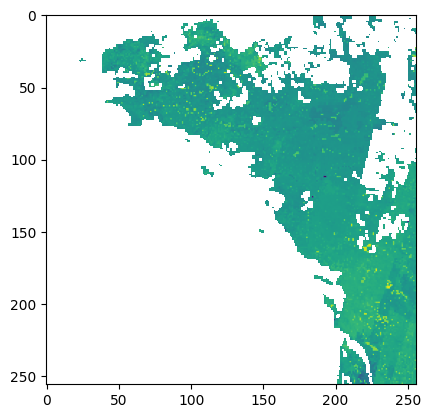

In [ ]:
with DataArrayReader(da) as dst:
    img = dst.tile(31, 22, 6)

plt.imshow(img.data_as_image())